In [1]:
!pip install yellowbrick

import pandas as pd
import numpy as np
data=pd.read_csv('Mall_Customers-2.csv')
data.info()

Defaulting to user installation because normal site-packages is not writeable
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [2]:
data.drop('CustomerID', axis = 1, inplace = True)

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
data.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


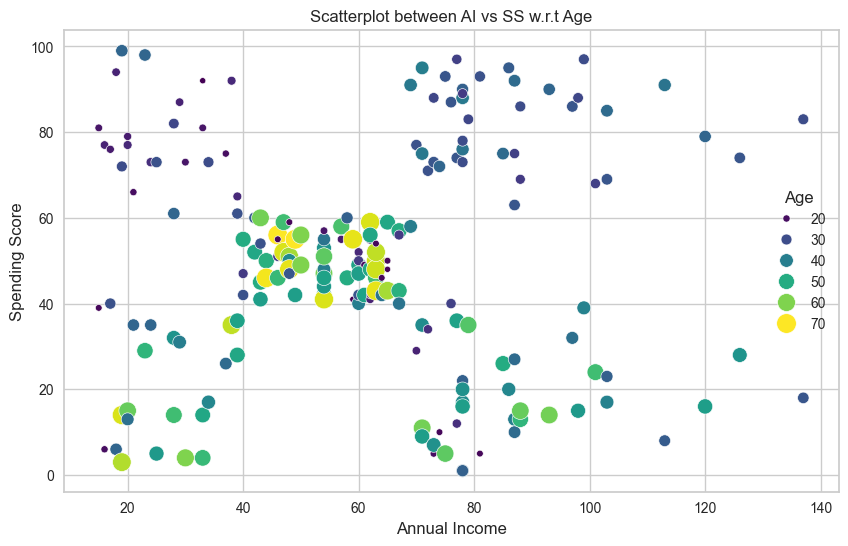

In [5]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], hue = data['Age'],
                          palette = 'viridis', size = data['Age'], sizes = (20, 200))
plt.title('Scatterplot between AI vs SS w.r.t Age')
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.grid(True)
plt.show()

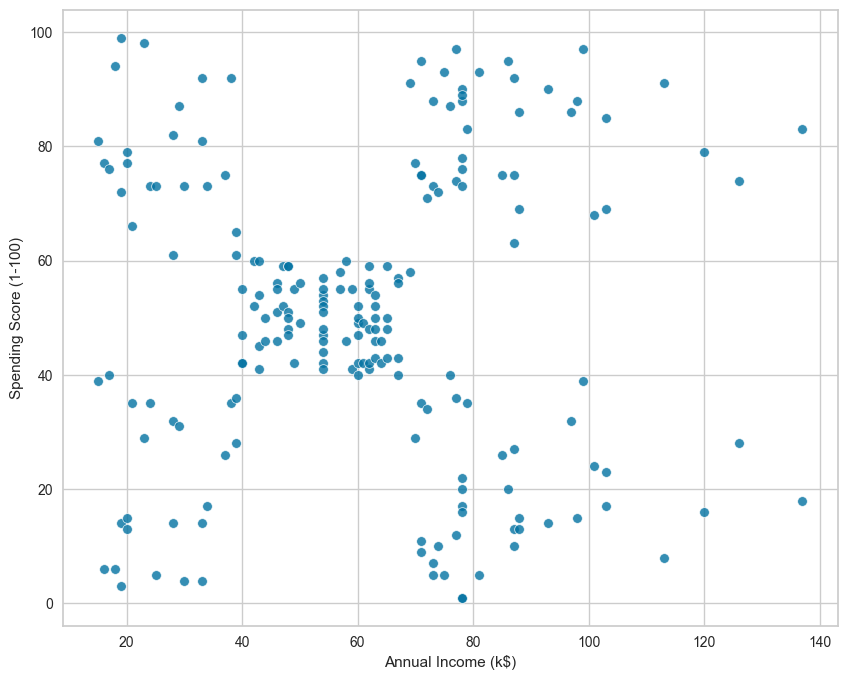

In [6]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data, alpha = 0.8)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
data_final = data.drop(['Age', 'Genre'], axis = 1)
sc = StandardScaler()
data_scaled = sc.fit_transform(data_final)
sum_of_squared_distance = []
s_score = []
k_range = range(2, 10)
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(data_scaled)
    sum_of_squared_distance.append(km.inertia_)
    s_score.append(silhouette_score(data_scaled, km.labels_))
sum_of_squared_distance

[273.66888662642015,
 157.7040081503594,
 109.22822707921344,
 65.56840815571681,
 60.13287487193421,
 49.668244837367986,
 37.31912287833883,
 32.49508119910091]

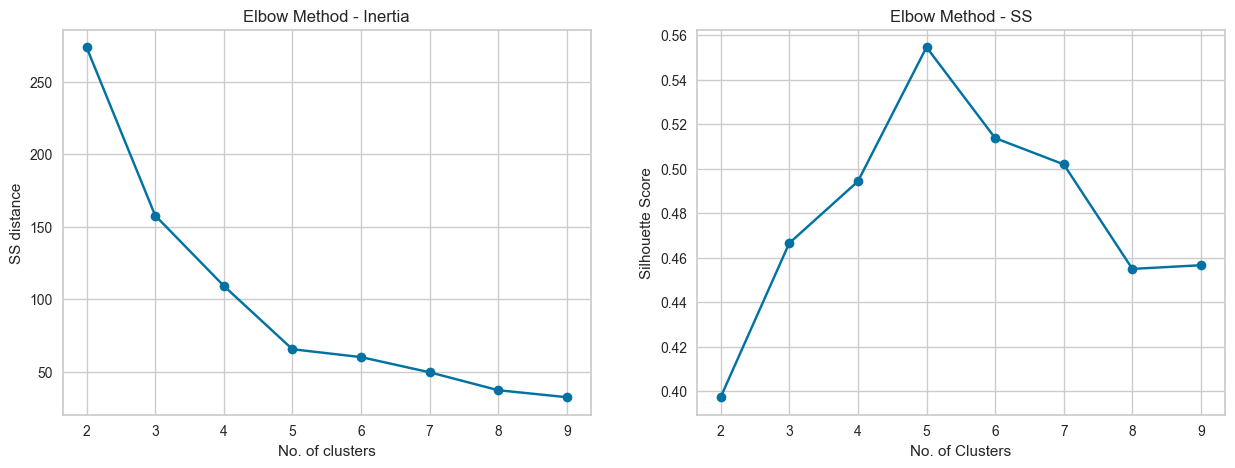

In [8]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sum_of_squared_distance, marker = 'o')
plt.title('Elbow Method - Inertia')
plt.xlabel('No. of clusters')
plt.ylabel('SS distance')
plt.subplot(1, 2, 2)
plt.plot(k_range, s_score, marker = 'o')
plt.title('Elbow Method - SS')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

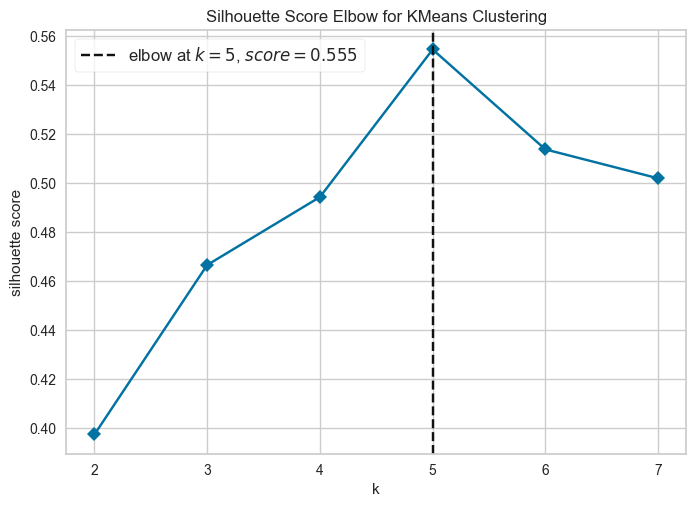

5


In [9]:
model = KMeans(random_state = 42)
visulaizer = KElbowVisualizer(model, k = (2,8), metric = 'silhouette', timings = False)
visulaizer.fit(data_scaled)
visulaizer.poof()
e = visulaizer.elbow_value_
print(e)

In [10]:
km = KMeans(n_clusters = e, random_state = 42)
y_label = km.fit_predict(data_scaled)
data['Clusters'] = y_label
y_label

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [11]:
print("Centroid",km.cluster_centers_)

Centroid [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [12]:
data.drop('Genre', axis = 1, inplace = True)
cluster_analysis=data.groupby('Clusters').mean()
cluster_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


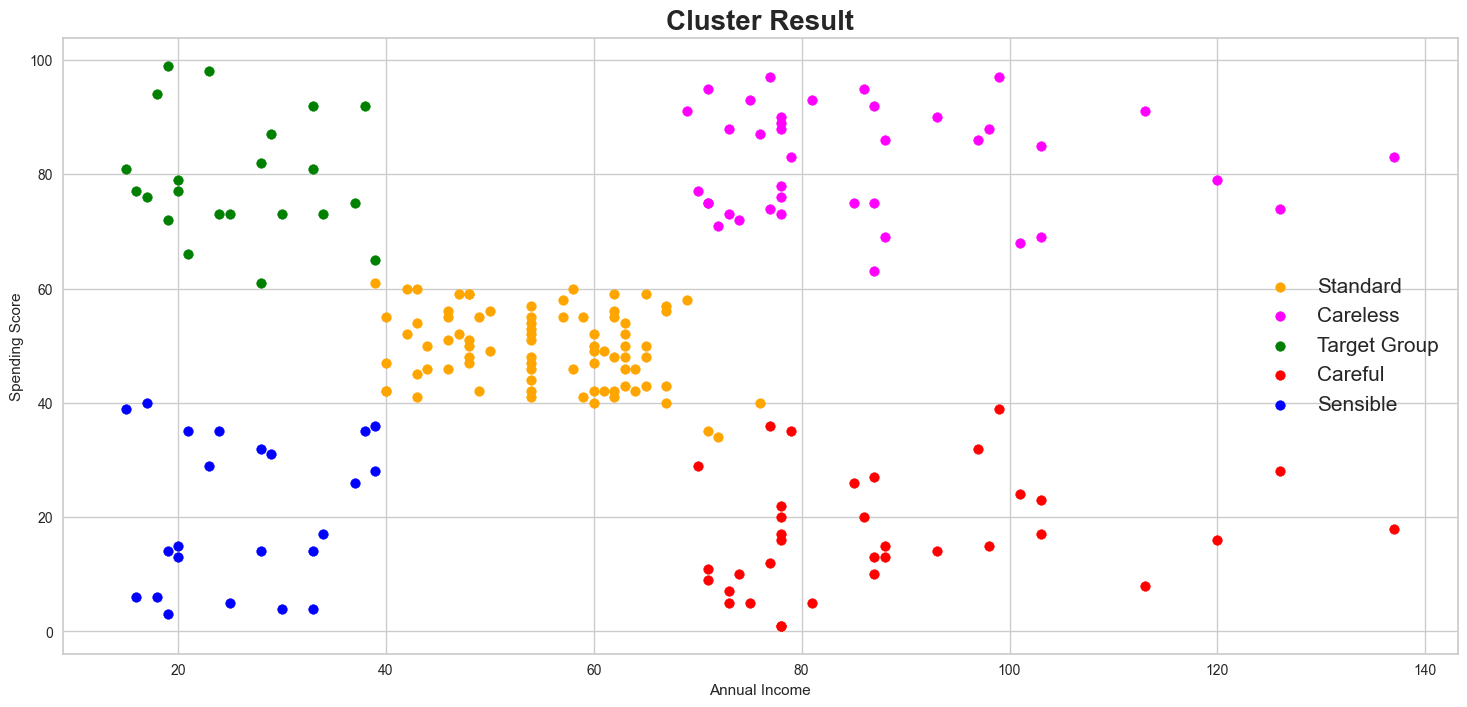

In [13]:
plt.figure(figsize = (18, 8))
df1 = data[data.Clusters == 0]
df2 = data[data.Clusters == 1]
df3 = data[data.Clusters == 2]
df4 = data[data.Clusters == 3]
df5 = data[data.Clusters == 4]
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color = 'orange', label = 'Standard')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color = 'magenta', label = 'Careless')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color = 'green', label = 'Target Group')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color = 'red', label = 'Careful')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color = 'blue', label = 'Sensible')
plt.title('Cluster Result', fontweight = 'bold', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(fontsize = 15)
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
score_kmeans_ss = silhouette_score(data_scaled, km.labels_)
print(score_kmeans_ss)
score_kmeans_c = calinski_harabasz_score(data_scaled, km.labels_)
print(score_kmeans_c)
score_kmeans_d = davies_bouldin_score(data_scaled, km.labels_)
print(score_kmeans_d)

0.5546571631111091
248.64932001536357
0.5722356162263352


Silhouette Score: Measure how similar an object is within its cluster Value of this silhouette score is between -1 & +1 1 means it is a well seperated cluster 0 means overlapping clusters -1 means poor clustering

Calinski-Harabasz Score: 0 & +infinity variance ratio criteria ratio = between cluster dispersion/within cluster dispersion the value is high means better is the clustering

Davis Bouldin Score: 0 & +infinity average similarity between each cluster and its most similar cluster intra-cluster similarity and inter cluster differences This value should be lower for better clustering